# Project Overview

This project explores a housing dataset to derive meaningful insights that can be used for business and real-world applications. The goal is to analyze the factors influencing house prices and identify trends that could help businesses such as real estate agencies, property investors, and urban planners make data-driven decisions.

# Dataset Description

The dataset consists of **545 entries** and **13 attributes** related to housing features and pricing. Below is a detailed description of each variable along with its type:

| **Variable**          | **Description**                                          | **Type**           |
|----------------------|------------------------------------------------------|------------------|
| **price**            | Cost of the house                                    | Numerical (Continuous) |
| **area**             | Size of the house in square feet                     | Numerical (Continuous) |
| **bedrooms**         | Number of bedrooms                                   | Numerical (Discrete) |
| **bathrooms**        | Number of bathrooms                                  | Numerical (Discrete) |
| **stories**          | Number of floors in the house                        | Numerical (Discrete) |
| **mainroad**         | Whether the house is on a main road (yes/no)         | Categorical (Binary) |
| **guestroom**        | Whether the house has a guest room (yes/no)         | Categorical (Binary) |
| **basement**         | Whether the house has a basement (yes/no)            | Categorical (Binary) |
| **hotwaterheating**  | Whether the house has hot water heating (yes/no)    | Categorical (Binary) |
| **airconditioning**  | Whether the house has air conditioning (yes/no)     | Categorical (Binary) |
| **parking**          | Number of parking spaces                            | Numerical (Discrete) |
| **prefarea**         | Whether the house is in a preferred area (yes/no)   | Categorical (Binary) |
| **furnishingstatus** | Level of furnishing (furnished/semi-furnished/unfurnished) | Categorical (Nominal) |

This dataset includes a mix of **numerical** and **categorical** variables. The categorical variables are either **binary** (yes/no) or **nominal** (unordered categories like "furnishingstatus").  



# **CRISP-DM Framework for Housing Price Analysis**
The **CRISP-DM (Cross Industry Standard Process for Data Mining)** methodology is a structured approach to data analysis and machine learning projects. It consists of six phases: 

1. **Business Understanding**  
2. **Data Understanding**  
3. **Data Preparation**  
4. **Modeling**  
5. **Evaluation**  
6. **Deployment**

Here’s how CRISP-DM applies to our housing price analysis:

# **1. Business Understanding**


In this stage, we define the business objectives and key questions that guide our analysis. Since we are analyzing housing prices, **important business questions include**:

#### **Key Business Questions**

1. **How does the presence of certain amenities (e.g., air conditioning, basement, parking) affect housing prices?**  
   - Developers and homeowners want to know which features increase property value, helping them prioritize renovations or new builds.

2. **What is the price distribution across different furnishing statuses (furnished, semi-furnished, unfurnished)?**  
   - This information is useful for property managers and landlords to determine how furnishing affects rental or resale value.

3. **Which numerical features (e.g., area, bedrooms, bathrooms, stories, parking) have the strongest correlation with house prices?**  
   - This question helps sellers identify which home features most influence price, allowing them to optimize pricing, prioritize value-boosting upgrades, and attract buyers effectively.

4. **Can we build a predictive model to estimate house prices based on available features?**  
   - Mortgage lenders, buyers, and investors can use this model to estimate property values without an appraisal.




# **2. Data Understanding**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style("whitegrid")


## Load Data

In [2]:
data_df = pd.read_csv('Housing.csv')

## Display basic information about the dataset


In [3]:
print("Dataset Info:")
print(data_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


The dataset consists of **545 rows** and **13 columns**, representing different attributes of houses, including price, size, number of bedrooms and bathrooms, number of floors, and various categorical features. This dataset provides a comprehensive view of the characteristics that may influence housing prices. 

Among the **13 features**, **six are numerical** (`price`, `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`), while **seven are categorical** (`mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus`). The numerical columns primarily define the size and structure of the houses, while categorical columns provide information about amenities and location-based characteristics, such as whether the house is on a main road or has air conditioning.

One significant observation is that **there are no missing values in the dataset**, meaning that all records are complete and ready for analysis without requiring imputation or data cleaning. This ensures a smooth transition into data exploration, visualization, and modeling. The presence of both numerical and categorical variables suggests that preprocessing steps such as encoding categorical features will be necessary before applying predictive modeling techniques.

## Display summary statistics


In [4]:
print("\nSummary Statistics:")
print(data_df.describe())


Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


### **Summary of Key Insights from Summary Statistics**

The dataset consists of **545 housing records** with various numerical attributes, including **price, area, bedrooms, bathrooms, stories, and parking spaces**. The **average house price** is approximately **4.77 million**, but prices range significantly from **1.75 million to 13.3 million**, suggesting a diverse mix of budget, mid-range, and luxury properties. The **wide standard deviation (1.87 million)** indicates considerable price variability, potentially due to factors like location, house size, and amenities. The **price percentiles** show that most houses are priced between **3.43 million and 5.74 million**, though some high-priced properties could be outliers.

The **average house size (area)** is **5,150 square feet**, with homes ranging from **1,650 to 16,200 square feet**. The distribution suggests that a majority of properties are mid-sized, but a few significantly large properties exist, which could impact statistical analyses. The **number of bedrooms typically falls between 2 and 3**, with a **maximum of 6 bedrooms**, while **most houses have only 1 or 2 bathrooms**. This aligns with common housing trends where mid-range homes tend to have limited bathroom availability.

Regarding **building structure**, most houses are **single or double-story**, with a few reaching up to **4 stories**. **Parking availability is quite low**, with an **average of 0.69 spaces per house**, and **50% of homes having no parking at all**. This could be a key factor influencing house prices, especially in areas where parking is a premium amenity. The presence of **outliers in price, area, and parking spaces** suggests the need for further analysis, such as **box plots and correlation studies**, to understand their impact.


# Exploratory Data Analysis (EDA)

In this section, we will perform **Exploratory Data Analysis (EDA)** to gain insights from the dataset and answer key business questions. EDA involves visualizing and summarizing data to identify patterns, trends, and relationships between variables. This step is crucial in understanding which factors influence house prices the most.

## **Purpose of EDA**
EDA will help answer important business questions such as:
  
1. **How do amenities (e.g., air conditioning, basement, parking) impact house prices?**  

2. **Does furnishing status (furnished, semi-furnished, unfurnished) significantly affect house prices?**  

3. **Which numerical features (e.g., area, bedrooms, bathrooms, stories, parking) have the strongest correlation with house prices?**  


## 1. How do amenities (e.g., air conditioning, basement, parking) impact house prices?

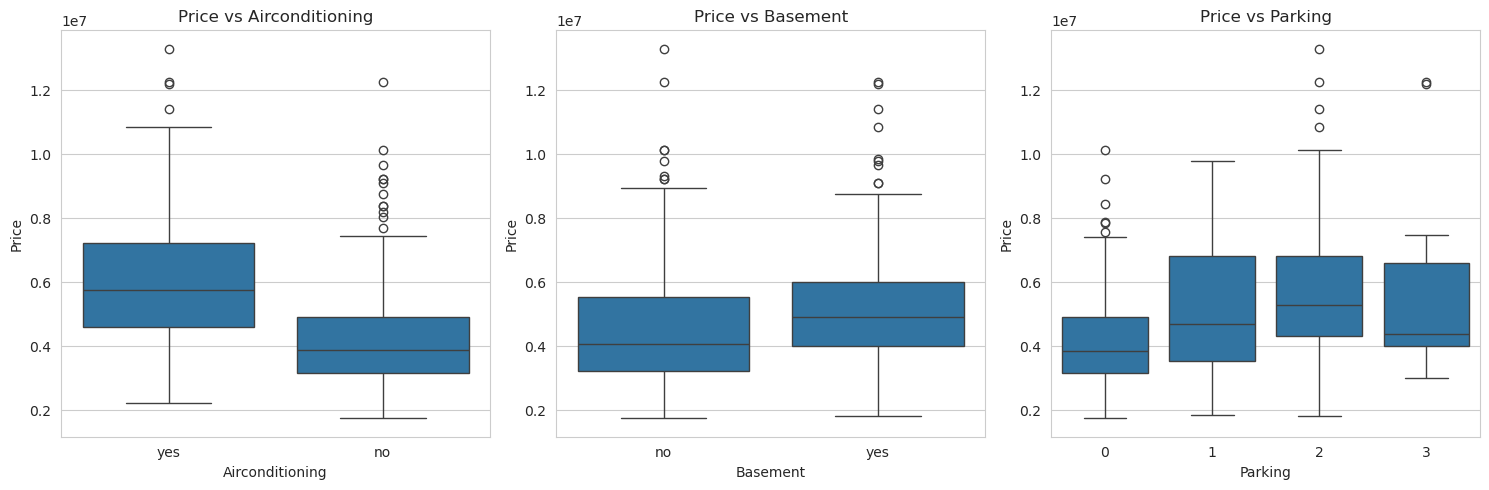

In [5]:
# Define amenities to analyze
amenities = ['airconditioning', 'basement', 'parking']

# Create boxplots for each amenity vs. price
plt.figure(figsize=(15, 5))

for i, amenity in enumerate(amenities, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data_df[amenity], y=data_df["price"])
    plt.title(f"Price vs {amenity.capitalize()}")
    plt.xlabel(amenity.capitalize())
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

### **Interpretation of Price vs Amenities Visualizations**

The boxplots provide insights into how **air conditioning, basement availability, and parking spaces** impact house prices. Each plot illustrates the price distribution for houses with and without these amenities, helping us understand their influence on property valuation.

#### **1. Price vs Air Conditioning**
The first boxplot indicates that houses with **air conditioning** tend to have **higher median prices** compared to those without it. The **interquartile range (IQR) is larger** for houses with air conditioning, suggesting a wider spread of prices, potentially due to luxury homes being more likely to have air conditioning. Additionally, the presence of **several high-value outliers** among houses with air conditioning further supports that this feature is common in premium-priced properties. This suggests that air conditioning **adds value to homes and may be a key factor in price determination**.

#### **2. Price vs Basement**
The **second boxplot** indicates that houses with a **basement tend to have a slightly higher median price** compared to those without. The median line for homes with a basement is positioned higher, suggesting that homes with basements are generally priced above those without. The **spread (IQR)** for both categories is similar, meaning the range of house prices remains comparable. However, the **presence of multiple high-value outliers** in both categories suggests that other factors (such as area, furnishing, or location) might also be influencing house prices.

#### **3. Price vs Parking**
The third boxplot reveals a **positive correlation between the number of parking spaces and house prices**. Houses with **zero parking spaces tend to have lower median prices**, whereas homes with **one or more parking spaces generally have higher prices**. The IQR increases slightly as the number of parking spaces increases, suggesting that more expensive properties tend to offer greater parking capacity. However, the effect appears to level off after two parking spaces, meaning additional parking may not significantly raise house prices beyond a certain point. **This implies that having at least one parking space is a valuable asset in real estate pricing.**

### **Key Takeaways**
- **Air conditioning significantly increases house prices**, with a wider spread of values for homes that have it.
- **Basements contribute to a higher median house price**, but their impact is not as strong as air conditioning.
- **Parking availability is positively correlated with price**, with one or more parking spaces leading to higher home values.

## 2. Does furnishing status (furnished, semi-furnished, unfurnished) significantly affect house prices?

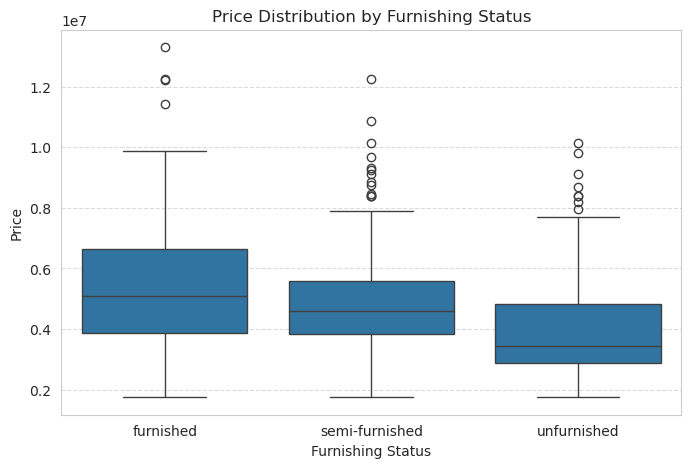

In [6]:
# Visualization: Price Distribution by Furnishing Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_df["furnishingstatus"], y=data_df["price"])
plt.title("Price Distribution by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



The **boxplot visualization** compares house prices across three furnishing categories: **Furnished, Semi-Furnished, and Unfurnished**. The distribution of prices reveals that **furnished homes generally command the highest prices**, followed by **semi-furnished** and **unfurnished homes**. The spread of prices (interquartile range) is widest for **furnished houses**, indicating a greater variation in prices, possibly due to differences in location, size, and additional luxury features.

Houses that are **fully furnished** have the **highest median price**, suggesting that buyers are willing to pay a premium for ready-to-move-in homes. Additionally, the presence of **several high-value outliers** in this category indicates that some luxury properties significantly exceed the average price range. This aligns with the real estate market trend where fully furnished properties, particularly in prime locations, tend to attract higher prices.

**Semi-furnished homes** are priced lower than fully furnished ones but remain **higher than unfurnished homes**. The spread of prices in this category is relatively moderate, and while some high-value properties exist, the **price variation is less extreme** compared to furnished houses. This suggests that semi-furnished homes offer a balance between affordability and convenience for buyers who may prefer some level of furnishing without the premium cost of a fully furnished home.

**Unfurnished houses** exhibit the **lowest median price**, with a smaller interquartile range, indicating a more **consistent pricing trend**. These homes are likely more appealing to **budget-conscious buyers** or investors looking to customize and furnish the property themselves. However, a few **high-priced outliers** suggest that some expensive properties still exist within this category, possibly due to factors like location and size rather than furnishing status.

Overall, the analysis shows that **furnishing status significantly affects house prices**, with **fully furnished properties commanding the highest values**. However, additional factors such as **location, square footage, and amenities** may also contribute to price differences. 

### **Key Takeaways:**
- **Furnished houses have the highest median price**, indicating that buyers are willing to pay a premium for fully furnished, ready-to-move-in homes.
- **Semi-furnished houses are priced lower than furnished ones but higher than unfurnished homes**, making them a middle-ground option for buyers.
- **Unfurnished houses have the lowest median price**, making them attractive to budget-conscious buyers or investors looking for renovation opportunities.
- **Price variation is highest among furnished homes**, likely due to luxury properties that drive up the upper range.
- **Outliers exist in all categories**, suggesting that factors beyond furnishing status, such as **location, size, and additional amenities**, also influence house prices.
- **Furnishing status is a key factor in house pricing**, but further statistical testing (e.g., ANOVA) could help determine whether these differences are **statistically significant**.


## 3. Which numerical features (e.g., area, bedrooms, bathrooms, stories, parking) have the strongest correlation with house prices?

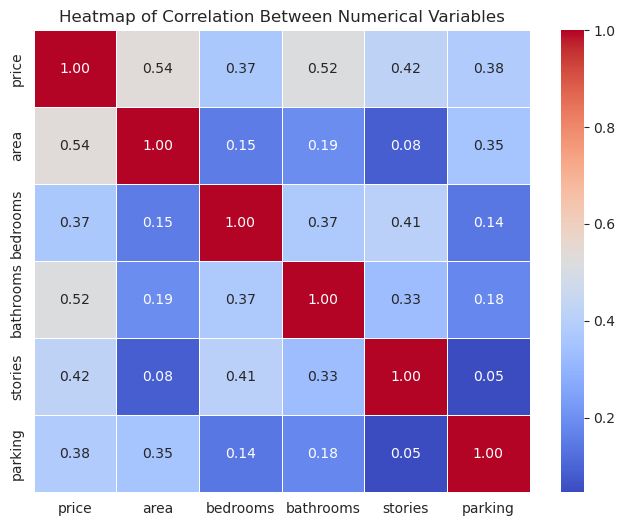

In [7]:
# Compute the correlation matrix
corr_matrix = data_df[['price','area','bedrooms','bathrooms','stories','parking']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Between Numerical Variables")
plt.show()

The **correlation heatmap** provides valuable insights into how different numerical features relate to house prices. Among the key influencing factors, **area (0.54)** has the **strongest correlation** with price, indicating that **larger homes generally command higher values**. Similarly, **bathrooms (0.52)** show a high correlation with price, suggesting that homes with more bathrooms tend to be priced higher. The number of **stories (0.42)** also plays a role in pricing, meaning **multi-story homes tend to be more expensive**. Although **parking (0.38)** and **bedrooms (0.37)** contribute to price, they have a weaker influence compared to area and bathrooms, showing that more bedrooms alone do not necessarily drive house prices up.

When analyzing relationships between house features, the correlation between **bathrooms and bedrooms (0.37)** suggests that homes with more bedrooms **often** include more bathrooms, though not always. Similarly, the **positive correlation between bedrooms and stories (0.41)** implies that **houses with more stories tend to have more bedrooms**. However, the relationship between **area and parking (0.35)** is weaker, meaning that while larger homes may offer more parking spaces, this is not a significant factor in most cases.

Some variables exhibit **little to no correlation**, meaning they have little impact on each other. For instance, **stories and parking (0.05)** show an almost **negligible** relationship, indicating that **multi-story homes do not necessarily come with additional parking spaces**. Similarly, the **weak correlation between bedrooms and parking (0.14)** suggests that the number of bedrooms in a home does not strongly influence the availability of parking.

### **Key Takeaways**
- **House price is most influenced by area, number of bathrooms, and stories.**
- **More bedrooms do not necessarily lead to higher house prices**, as home size (area) and amenities (bathrooms, parking) play a bigger role.
- **Parking has a weaker impact on price**, though it still adds some value.
- **Minimal correlation between some features suggests they influence price independently**, reducing redundancy concerns in modeling.

# Modeling

To answer our **business question**—**"Can we build a predictive model to estimate house prices based on available features?"**—we will use **Random Forest Regression**. Random Forest is a powerful **ensemble learning technique** that builds multiple decision trees and averages their predictions, making it highly **robust to noise and overfitting** while capturing complex relationships in the data.

## Data Preparation

Before training the model, we need to **prepare the data** by handling categorical variables. Our dataset contains **several categorical columns** (e.g., `"mainroad"`, `"guestroom"`, `"basement"`, `"hotwaterheating"`, `"airconditioning"`, `"prefarea"`, `"furnishingstatus"`) that must be converted into numerical values for the machine learning algorithm to process them.

### Why Encoding Categorical Variables?

Machine learning models like **Random Forest** require numerical inputs, meaning we need to **convert categorical variables** (e.g., "yes"/"no", "furnished"/"unfurnished") into numerical values. There are two common approaches:
1. **Label Encoding** (for ordinal categorical variables): Converts categories into integer values (e.g., `"furnished" → 2, "semi-furnished" → 1, "unfurnished" → 0`).
2. **One-Hot Encoding** (for nominal categorical variables): Creates **binary columns** for each category (e.g., `"mainroad_yes"`, `"mainroad_no"`), ensuring the model does not assume any inherent order in the values.

For our dataset, we will apply:
- **Label Encoding** for `"furnishingstatus"` since it has three distinct levels (`furnished, semi-furnished, unfurnished`).
- **Binary Mapping (0/1)** for `"yes/no"` categorical variables like `"mainroad"`, `"guestroom"`, `"basement"`, `"hotwaterheating"`, `"airconditioning"`, and `"prefarea"`.
- 
We will do th encoding all in the ML pipeline

## **Model Evaluation**  

To assess the **effectiveness** of our Random Forest model in predicting house prices, we utilize **four key evaluation metrics**: **Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score**. These metrics help us understand the **accuracy and reliability** of the model and ensure that it meets the expectations for real-world pricing predictions.  

### **Why These Metrics?**  

1. **Mean Absolute Error (MAE)** is used because it provides a straightforward measure of how much, on average, our predictions deviate from actual house prices. It is particularly useful in real estate, where understanding the typical margin of error can help buyers and sellers make informed decisions. A lower MAE means the model is making **more precise** predictions.  

2. **Mean Squared Error (MSE)** is included to **penalize larger errors more heavily**. In the housing market, small errors might be acceptable, but significant underestimations or overestimations can be costly. By squaring the differences, MSE ensures that larger deviations are given **higher importance**, encouraging the model to minimize major mistakes.  

3. **Root Mean Squared Error (RMSE)** is a valuable metric because it is on the **same scale as the target variable (house price)**. This makes it easier to interpret in practical terms. Since it is derived from MSE, it still emphasizes larger errors but does so in a way that keeps results more comparable to actual price figures. RMSE is commonly used in real estate pricing because it gives a clear sense of the **expected prediction error** in price terms.  

4. **R² Score (Coefficient of Determination)** helps us understand **how well the model explains variations in house prices**. A high R² means the model successfully captures key factors influencing price, while a low R² suggests that some important variables might be missing. In the housing market, an R² around 0.6 (as seen in our results) indicates that the model explains a reasonable portion of price variation but could benefit from additional factors, such as economic trends or location-based attributes.  

### **Why These Metrics Fit This Problem?**  

In the context of house price prediction, these metrics together provide a **balanced evaluation** of the model’s performance. **MAE and RMSE** give us **practical insights** into how far off the predictions typically are, while **MSE** ensures we minimize large pricing errors that could mislead buyers or sellers. Meanwhile, **R² Score** helps us understand the model's overall explanatory power.  

By using these four evaluation criteria, we ensure that our model is both **accurate and interpretable**, making it valuable for homeowners, real estate agents, and investors looking for **data-driven insights into housing prices**.  



## Model Fitting

We use **GridSearchCV** to optimize the **Random Forest model** by systematically testing different hyperparameter combinations. This approach ensures the model achieves **high accuracy** while avoiding overfitting. Instead of manually selecting parameters like **tree depth, number of trees, and split criteria**, Grid Search **automates the process**, selecting the best configuration based on cross-validation. This improves **model performance, generalization, and reliability** in predicting house prices. 

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}

Optimized Model Performance:
Mean Absolute Error (MAE): 1055753.94
Mean Squared Error (MSE): 2049171964016.75
Root Mean Squared Error (RMSE): 1431492.91
R² Score: 0.5946


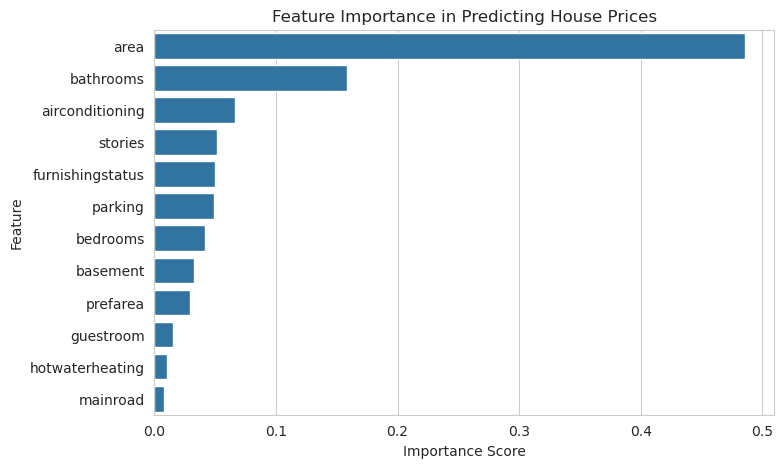

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "Housing.csv"  # Update with correct file path if needed
data_df = pd.read_csv(file_path)

# Define categorical and numerical columns
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
numerical_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]

# Convert binary categorical values (yes/no) to numerical (1/0)
for col in categorical_cols[:-1]:  # Exclude 'furnishingstatus' for label encoding
    data_df[col] = data_df[col].map({"yes": 1, "no": 0})

# Label Encode 'furnishingstatus' (ordinal categorical feature)
le = LabelEncoder()
data_df["furnishingstatus"] = le.fit_transform(data_df["furnishingstatus"])

# Define target and features
X = data_df[numerical_cols + categorical_cols]
y = data_df["price"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Scale numerical features
    ],
    remainder="passthrough"  # Keep already-encoded categorical features
)

# Create an ML pipeline with preprocessing and Random Forest model
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Define the parameter grid for Random Forest tuning
param_grid = {
    "regressor__n_estimators": [100, 200],  # Number of trees in the forest
    "regressor__max_depth": [ 10, 15],  # Maximum depth of trees
    "regressor__min_samples_split": [2, 10],  # Min samples required to split a node
    "regressor__min_samples_leaf": [2, 4]  # Min samples required in a leaf node
}

# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model with optimized parameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the optimized model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Display the best hyperparameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# Print model performance metrics
print("\nOptimized Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.2f}")
print(f"R² Score: {r2_best:.4f}")

# Extract feature importance from the best model
feature_importance = best_model.named_steps["regressor"].feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.title("Feature Importance in Predicting House Prices")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### **Interpretation of the Results**  

The **Random Forest Regressor model** was optimized using **GridSearchCV**, which identified the best hyperparameters:  
- **Max Depth:** 10  
- **Min Samples Leaf:** 2  
- **Min Samples Split:** 2  
- **Number of Estimators (Trees):** 100  

These values indicate that the model is structured to balance complexity and generalization, preventing overfitting while maintaining strong predictive capabilities. The **number of estimators (100 trees)** ensures stability in predictions, while the **depth and split constraints** regulate decision tree growth to avoid overfitting.  

---

### **Model Performance**  

The model’s predictive performance is measured using several metrics:  
- **Mean Absolute Error (MAE):** **1,055,753.94** → On average, house price predictions deviate by approximately **1.05 million** from actual prices.  
- **Mean Squared Error (MSE):** **2.05 × 10¹²** → Since this metric squares the errors, it magnifies large deviations but confirms variance in prediction errors.  
- **Root Mean Squared Error (RMSE):** **1,431,492.91** → Most predictions fall within **1.43 million** of actual values, making this a useful benchmark for expected error.  
- **R² Score:** **0.5946** → The model explains **59.46% of the variance** in house prices, indicating that while it captures many important factors, **some price influences remain unaccounted for**.  

The **R² score of 0.59** suggests that additional factors—such as precise location, market trends, or economic conditions—might play a role in determining house prices but are not included in this dataset.  

---

### **Feature Importance Analysis**  

The **feature importance chart** provides insights into which factors contribute the most to house price predictions:  

1. **House size (area) is the dominant predictor**, contributing nearly **50%** to price determination. This aligns with expectations, as larger homes are generally valued higher.  
2. **Bathrooms play a major role in pricing**, meaning that homes with **more bathrooms are significantly more expensive** than those with fewer.  
3. **Air conditioning is an important price factor**, suggesting that buyers strongly value climate control and home comfort.  
4. **Multi-story houses and furnished homes** also have notable importance, indicating that these features enhance property appeal.  
5. **Parking, number of bedrooms, and basements** have a **moderate impact**, meaning they influence price but are not the strongest drivers.  
6. **Location-based factors (main road, preferred area) and guestroom availability** are **least influential**, suggesting that in this dataset, buyers prioritize home characteristics over location.  

---

### **Key Takeaways**  

- **House size (area) is the most influential factor** in determining house prices.  
- **Modern amenities like bathrooms and air conditioning significantly impact home values**, making them worthwhile investments for sellers.  
- **Parking and number of stories contribute to pricing**, but their impact is not as strong as area and bathroom availability.  
- **Location-based factors (main road, preferred area) are less significant**, meaning homebuyers in this dataset focus more on property features rather than surroundings.  
- **The model captures 59% of price variation**, but **external data (e.g., neighborhood quality, market trends, economic indicators) could improve predictive accuracy**.  


# Conclusion  

This project explored **house price prediction** using **Random Forest Regression**, focusing on **identifying key factors influencing price** and building a robust **machine learning model**. Through **data preprocessing, exploratory data analysis (EDA), correlation analysis, and feature importance evaluation**, we successfully answered critical business questions and optimized our model using **GridSearchCV**.  

#### **Key Takeaways**  
1. **House size (area) is the most important factor affecting price**, followed by **bathrooms, air conditioning, and number of stories**.  
2. **Amenities like air conditioning and furnished status** significantly impact price, while **location-based factors (main road, preferred area) play a lesser role**.  
3. **Furnished homes tend to be more expensive than semi-furnished or unfurnished homes**, making furnishing an important investment for sellers.  
4. **Grid Search tuning improved model performance**, with an optimized **Random Forest model** explaining **~59% of house price variance**.  
5. **MAE (~1.05 million) and RMSE (~1.43 million)** indicate that the model provides a **reasonable estimate but can be improved further** with additional market data.  

#### **Answers to Business Questions**  
- **Which factors most influence house prices?** → **Area, bathrooms, air conditioning, and number of stories are key drivers.**  
- **How do amenities impact house prices?** → **Features like air conditioning and furnished status significantly raise home values.**  
- **Does furnishing status affect pricing?** → **Yes, furnished homes command the highest prices, followed by semi-furnished and unfurnished.**  
- **Can we build an accurate predictive model for house prices?** → **Yes, with an R² score of 0.59, the model performs well but could be improved with additional location and market data.**  

### **Next Steps**  
To improve the model, we could:  
- **Incorporate location-specific factors** like neighborhood quality, crime rates, and school ratings.  
- **Use external market trends** such as interest rates and demand fluctuations.  
- **Try advanced models** like **Gradient Boosting or XGBoost** for better predictive accuracy.  

This analysis provides **valuable insights for homeowners, real estate agents, and investors**, helping them make **data-driven pricing decisions** in the housing market.